

# Project: Investigating a Brazilain medical appointments dataset
## By Mohammed AlJarbou

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
 <li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. Several
characteristics of the patient are
included in each row.

* ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
* ‘Neighborhood’ indicates the
location of the hospital.
* ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
*  Last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

Other features include if the patients have (hypertension, handicap, diabetes, and alcoholism) and received SMS reminders for their appointments.

The goal for the project is to find what factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment
## Research Questions
Question 1: Is there a relationship between the following personal parts of information and no-shows?
1. Gender
2. Scholarship
3. Hypertension
4. Diabetes
5. Alcoholism
6. Handicap
7. Age
8. Neighborhood

Question 2: Did SMS decreases the possibility of patients not showing up?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
 ##### In this section of the report, I will load the data, check for cleanliness, and then trim and clean our dataset for analysis

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


* For privacy and data analysis no need for 4 columns which are PatientId, AppointmentID, ScheduledDay, and AppointmentDay.
* F and M for Gender.
* 0 or 1 for Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, and SMS_received.
* For the No-show column put No if the patients showed, Yes if not.
* No-show will be No_show.
* Some columns are misspelled.

Need to change the column names that are misspelled.  
All columns to lower case to make it easy to access them.


In [3]:
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap' , "No-show" : "No_show" }, inplace=True)
df.columns= df.columns.str.lower()

In [4]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [5]:
#   types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hypertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handicap        110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


 * Looks there are no missing values.
 * Data types look great. 
 * I will remove patientid, appointmentid, scheduledday and appointmentday.

In [6]:
#To make sure that there is no missing values.
df.isnull().sum().sum()

0

In [7]:
#To check if there are duplicated rows.
sum(df.duplicated()) 

0

In [8]:
df.shape

(110527, 14)

 * 110527 record with 14 features.

In [9]:
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* The mean for ages is 37 
* Maximum age is 115
* Looks like we have a minimum age of -1 which is impossible to happen, I need to fix that in the next cells.


 Now, checking if there are invalid data.
 Check column by column.

In [10]:
gender = set(df['gender']) #Looks great.
print(gender)

{'M', 'F'}


In [11]:
age = set(df['age']) 
print(age)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115, -1}


* Here, should put range from 0 to 100.
* There is a high chance that ages with more than 100 are entered by mistake so we will remove them.
* -1 is not a valid number.


In [12]:
scholarship = set(df['scholarship']) #Looks great.
print(scholarship)

{0, 1}


In [13]:
hypertension = set(df['hypertension']) #Looks great.
print(hypertension)

{0, 1}


In [14]:
diabetes = set(df['diabetes']) #Looks great.
print(diabetes)

{0, 1}


In [15]:
alcoholism = set(df['alcoholism']) #Looks great.
print(alcoholism)

{0, 1}


In [16]:
handicap = set(df['handicap'])
print(handicap)

{0, 1, 2, 3, 4}


* Here, I should remove rows with 2,3, and 4.
* Handicap takes only 0 or 1.

In [17]:
sms_received= set(df['sms_received']) #Looks great.
print(sms_received)

{0, 1}


In [18]:
no_show= set(df['no_show']) #Looks great.
print(no_show)

{'Yes', 'No'}




### Data Cleaning 
#### Now, it's time to remove or edit any invalid data.

In [19]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Taking rows with range from 0 to 100 in Age columns.
df = df[(df['age']>=0) & (df['age']<=100)]

#Taking rows with 0 or 1 in Handicap columns.
df = df[(df['handicap']>=0) & (df['handicap']<=1)]


 Check again:

In [20]:
age = set(df['age']) #Looks great.
print(age) 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}


In [21]:
handicap = set(df['handicap']) #Looks great.
print(handicap)

{0, 1}


Now, drop the columns that I don't want for analysis.

In [22]:
df.drop(["patientid", "appointmentid", "scheduledday", "appointmentday" ] , axis=1 , inplace=True)
df.head(1)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

##### Now that I've trimmed and cleaned my data, I'm ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions.

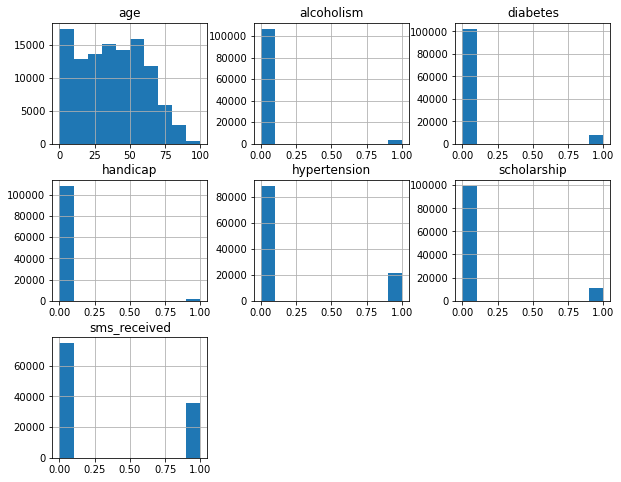

In [23]:
df.hist(figsize=(10,8));

* Most of the patients don't have alcoholism, diabetes, hypertension, and handicap
* About 10% of the patients have a scholarship.
* Most of the patients didn't receive an SMS.


In [24]:
show = df.no_show == "No"
noshow = df.no_show == "Yes"

In [25]:
df[show].count()

gender           88045
age              88045
neighbourhood    88045
scholarship      88045
hypertension     88045
diabetes         88045
alcoholism       88045
handicap         88045
sms_received     88045
no_show          88045
dtype: int64

In [26]:
df[noshow].count()

gender           22275
age              22275
neighbourhood    22275
scholarship      22275
hypertension     22275
diabetes         22275
alcoholism       22275
handicap         22275
sms_received     22275
no_show          22275
dtype: int64

### Research Question 1: Is there a relationship between the following personal parts of information and no-shows?
1. Gender
2. Scholarship
3. Hypertension
4. Diabetes
5. Alcoholism
6. Handicap
7. Age
8. Neighborhood

In [27]:
# Let's start with the gender 
df.groupby("gender").size() #shows how many male and female.

gender
F    71723
M    38597
dtype: int64

In [28]:
#Check the percentage of males anf females if they show up or not.
df.groupby("gender")['no_show'].value_counts(normalize = 'true')

gender  no_show
F       No         0.796927
        Yes        0.203073
M       No         0.800244
        Yes        0.199756
Name: no_show, dtype: float64

Text(0, 0.5, 'percentage of M and F')

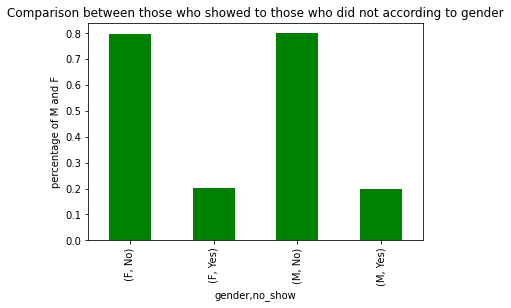

In [29]:
df.groupby("gender")['no_show'].value_counts(normalize = 'true').plot(kind = 'bar', color = "green")
plt.title("Comparison between those who showed to those who did not according to gender");
plt.ylabel("percentage of M and F") # Plot to show the comparison of the gender.

* Here, 20% of males and females did not show up on their appointment day.
* I don't see any correlation.

In [30]:
df.groupby("scholarship").size() #shows how many people have scholarship and how many do not.

scholarship
0    99477
1    10843
dtype: int64

In [31]:
#Check the percentage of pepole who have scholarship, if they show up or not.
df.groupby("scholarship")['no_show'].value_counts(normalize = 'true')

scholarship  no_show
0            No         0.801984
             Yes        0.198016
1            No         0.762335
             Yes        0.237665
Name: no_show, dtype: float64

Text(0, 0.5, 'percentage of scholarship')

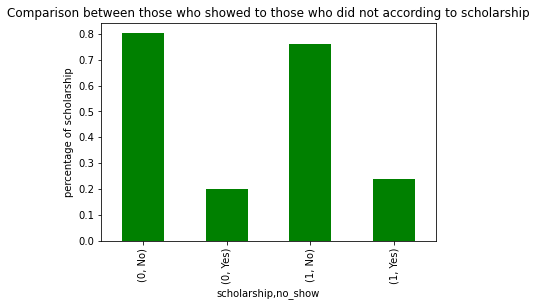

In [32]:
df.groupby("scholarship")['no_show'].value_counts(normalize = 'true').plot(kind = 'bar', color = "green")
plt.title("Comparison between those who showed to those who did not according to scholarship");
plt.ylabel("percentage of scholarship") # Plot to show the comparison of the scholarship.

* People who have a scholarship tend to not show up than the people who have scholarship.
* I don't see any correlation.

In [33]:
df.groupby("hypertension").size() #shows how many pepole have Hypertension and how many do not.

hypertension
0    88605
1    21715
dtype: int64

In [34]:
#Check the percentage of pepole who have hypertension, if they show up or not.
df.groupby("hypertension")['no_show'].value_counts(normalize = 'true')

hypertension  no_show
0             No         0.790903
              Yes        0.209097
1             No         0.827400
              Yes        0.172600
Name: no_show, dtype: float64

Text(0, 0.5, 'percentage of hypertension')

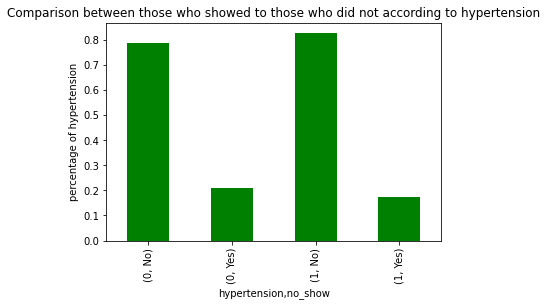

In [35]:
df.groupby("hypertension")['no_show'].value_counts(normalize = 'true').plot(kind = 'bar', color = "green")
plt.title("Comparison between those who showed to those who did not according to hypertension");
plt.ylabel("percentage of hypertension") # Plot to show the comparison of the hypertension.

* People who have hypertension tend to show up than the people who have not hypertension.
* I don't see a strong correlation here.

In [36]:
df.groupby("diabetes").size() #shows how many pepole have diabetes and how many do not.

diabetes
0    102420
1      7900
dtype: int64

In [37]:
#Check the percentage of pepole who have diabetes, if they show up or not.
df.groupby("diabetes")['no_show'].value_counts(normalize = 'true')

diabetes  no_show
0         No         0.796397
          Yes        0.203603
1         No         0.820000
          Yes        0.180000
Name: no_show, dtype: float64

Text(0, 0.5, 'percentage of diabetes')

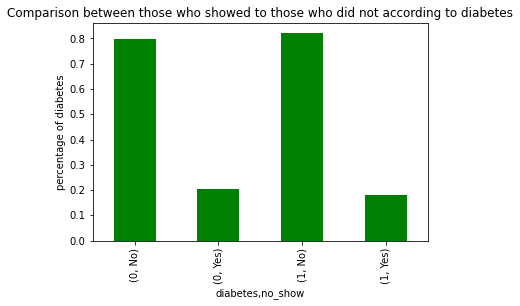

In [38]:
df.groupby("diabetes")['no_show'].value_counts(normalize = 'true').plot(kind = 'bar', color = "green")
plt.title("Comparison between those who showed to those who did not according to diabetes");
plt.ylabel("percentage of diabetes") # Plot to show the comparison of the diabetes.

* People who have diabetes tend to show up than the people who have not diabetes.
* We don't see a strong correlation here.

In [39]:
df.groupby("alcoholism").size() #shows how many pepole have alcoholism and how many do not.

alcoholism
0    106968
1      3352
dtype: int64

In [40]:
#Check the percentage of pepole who have alcoholism, if they show up or not.
df.groupby("alcoholism")['no_show'].value_counts(normalize = 'true')

alcoholism  no_show
0           No         0.798070
            Yes        0.201930
1           No         0.798628
            Yes        0.201372
Name: no_show, dtype: float64

Text(0, 0.5, 'percentage of alcoholism')

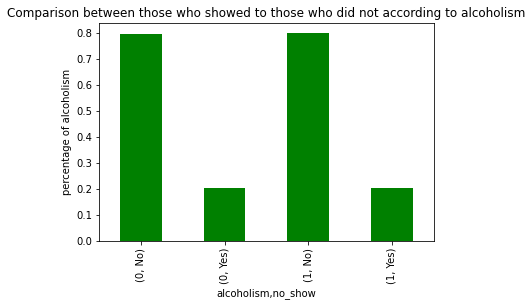

In [41]:
df.groupby("alcoholism")['no_show'].value_counts(normalize = 'true').plot(kind = 'bar', color = "green")
plt.title("Comparison between those who showed to those who did not according to alcoholism");
plt.ylabel("percentage of alcoholism")  # Plot to show the comparison of the alcoholism.

* People who have alcoholism tend to show up than the people who have not alcoholism.
* We don't see a strong correlation here.

In [42]:
df.groupby("handicap").size() #shows how many pepole have Handicap and how many do not.

handicap
0    108282
1      2038
dtype: int64

In [43]:
#Check the percentage of pepole who have handicap, if they show up or not.
df.groupby("handicap")['no_show'].value_counts(normalize = 'true')

handicap  no_show
0         No         0.797639
          Yes        0.202361
1         No         0.821884
          Yes        0.178116
Name: no_show, dtype: float64

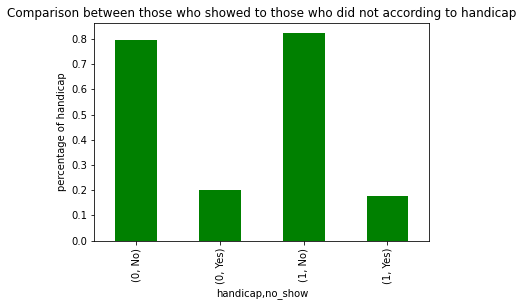

In [44]:
df.groupby("handicap")['no_show'].value_counts(normalize = 'true').plot(kind = 'bar', color = "green")
plt.title("Comparison between those who showed to those who did not according to handicap");
plt.ylabel("percentage of handicap"); # Plot to show the comparison of the handicap.

* People who have handicap tend to show up than the people who have not handicap.
* I don't see a strong correlation here.

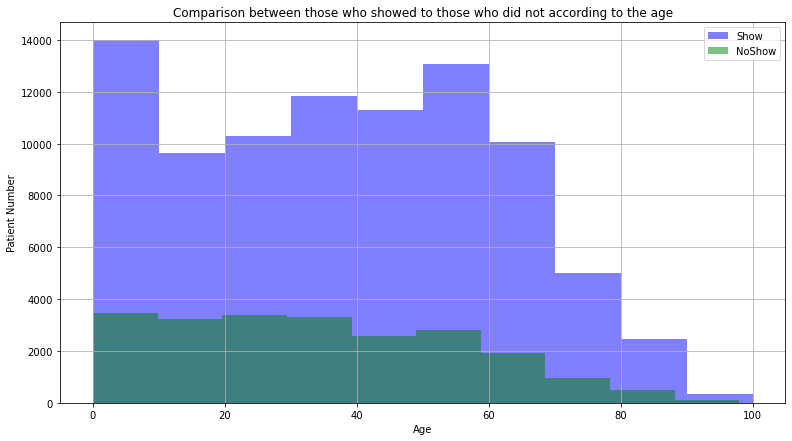

In [45]:
plt.figure(figsize=[13,7])
df.age[show].hist(alpha = 0.5 , label = "Show",  color = "blue")
df.age[noshow].hist(alpha = 0.5 , label = "NoShow" , color = "green")
plt.title("Comparison between those who showed to those who did not according to the age")
plt.ylabel("Patient Number")
plt.xlabel("Age")
plt.legend();  # Plot to show the comparison of the Age.

* it seems that ages from (0 to 10) and (35 to 60) tend to show up to their appointment.

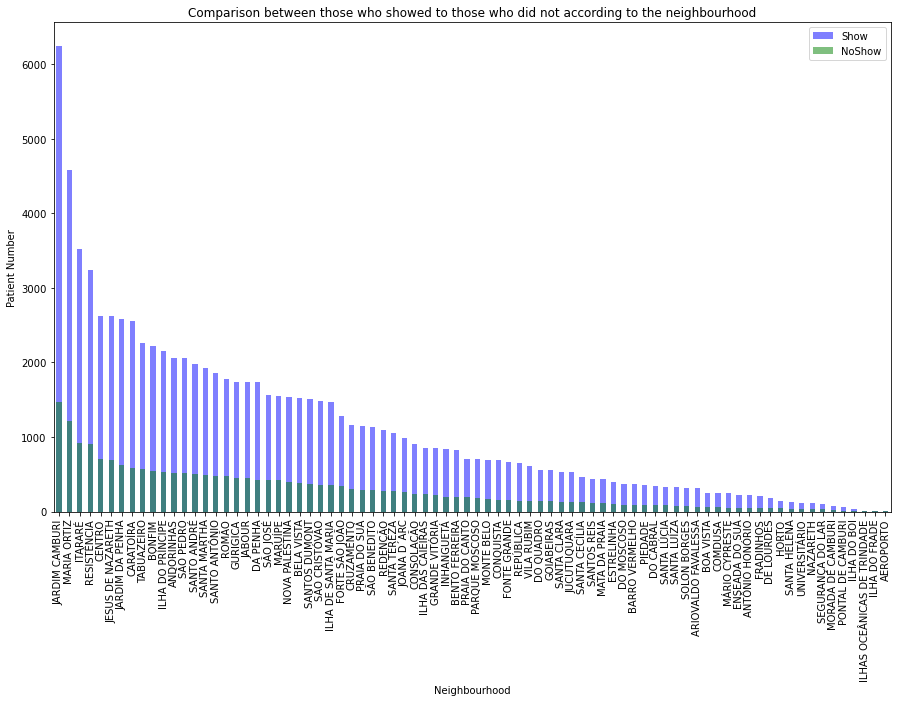

In [55]:
plt.figure(figsize=[15,9])
df.neighbourhood[show].value_counts().plot(kind = "bar" , alpha = 0.5 , label = "Show",  color = "blue")
df.neighbourhood[noshow].value_counts().plot(kind = "bar" , alpha = 0.5 , label = "NoShow" , color = "green")
plt.title("Comparison between those who showed to those who did not according to the neighbourhood")
plt.ylabel("Patient Number")
plt.xlabel("Neighbourhood")
plt.legend();  # Plot to show the comparison of the neighbourhood.

* Here, it seems that the neighborhood has a good correlation with the possibility of patients showing up.

### Research Question 2: Did SMS decreases the possibility of patients not showing up?

In [57]:
df.groupby("sms_received").size() # shows how many people have received SMS and how many do not.


sms_received
0    74886
1    35434
dtype: int64

In [58]:
#Check the percentage of pepole who have received SMS, if they show up or not.
df.groupby("sms_received")['no_show'].value_counts(normalize = 'true')

sms_received  no_show
0             No         0.833080
              Yes        0.166920
1             No         0.724135
              Yes        0.275865
Name: no_show, dtype: float64

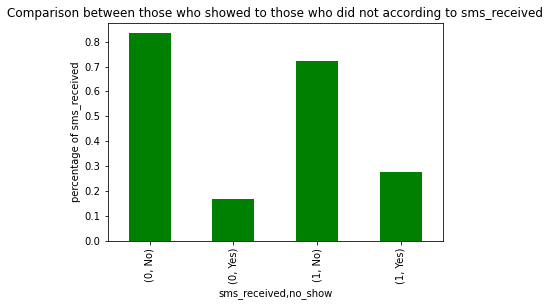

In [59]:
df.groupby("sms_received")['no_show'].value_counts(normalize = 'true').plot(kind = 'bar', color = "green")
plt.title("Comparison between those who showed to those who did not according to sms_received");
plt.ylabel("percentage of sms_received"); # Plot to show the comparison of the SMS.

* People who have an SMS tend to not show up than the people who have SMS.
* I don't see any correlation.
* It might be because most people ignore SMS.

<a id='conclusions'></a>
## Conclusions

* I can conclude that the neighborhood is strongly related to the patient showing up.
* Ages from (0 to 10) and (35 to 60) tend to show up to their appointment.
* SMS didn't decrease the possibility of patients not showing up

  <a id='limitations'></a>
## Limitations

* I didn't find any strong correlation between patient showing up and many features.
* for further analysis, if I add one more variable to the relationship maybe I will find a correlation.

  <a id='references'></a>
## References

* https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf
* https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
* https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
* https://stackoverflow.com/questions/39551566/create-a-set-from-a-series-in-pandas
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.drop.html
* https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
* https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
* https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
* https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html